In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10
SIZE = N*N
MAX_STEPS = SIZE
M = 20
EPISODES = 1000
ALPHA = 0.8
LAMBDA = 0.8
INT_MIN = -99999

In [3]:
def reward(ele):
    if ele == 0:
        return -100
    elif ele == 1 or ele == -1:
        return 0
    elif ele == -2:
        return 100

In [4]:
#return statement right 0, down 1, left 2, up 3
def chooseAction(matrix, statec, Q):
    j = [1, 0, -1, 0]
    i = [0, 1, 0, -1]
    ls = []
    for k in range(4):
        idx = statec[0] + i[k]
        idy = statec[1] + j[k]
        #checking the range of indices in the matrix
        if(idx  >=0 and idx <=N-1 and idy >=0 and idy  <=N-1):
            ls.append(Q[idx, idy, k])
        else:
            ls.append(INT_MIN)
    return (statec[0] + i[np.argmax(ls)], statec[1] + j[np.argmax(ls)]), np.argmax(ls)

In [57]:
chooseAction(matrix, (N-1, N-1), Q)

((3, 2), 2)

In [13]:
np.random.seed(41)
#making matrix representing hole and frozen lake
#0 represent hole, 1 represent frozen lake, -1 represent start, -2 repesent terminal
a = np.ones(SIZE - M - 2) #-2 for start and terminal
b = np.zeros(M)
c = np.hstack((a, b))
np.random.shuffle(c)
start = -1
end = -2
matrix = np.hstack((start, c, end)).reshape(N, N)
matrix_new = matrix

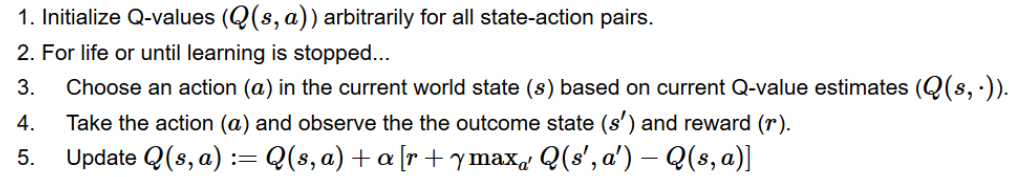

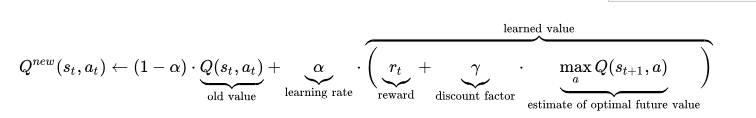

In [6]:
matrix

array([[-1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1., -2.]])

In [14]:
#Q(s, a) matrix which is initially zero and of size N X N X 4
#there are four actions right left up down
#action right  = 0, down  = 1, left = 2, up = 3
Q = np.zeros((N, N, 4))
rewardList = []
for epochs in range(EPISODES):
    #i, j represent indices
    statec = (0, 0)#current state
    total_reward = 0
    for steps in range(MAX_STEPS):
        #print(statec, total_reward)
        if(statec == (N-1, N-1)):
            break
        #choose current action with maximum Q value
        statenew, actionc = chooseAction(matrix, statec, Q)
        #print(statenew)
        stateflag, actionprime = chooseAction(matrix, statenew, Q)
        #update the Q table
        first_part = (1-ALPHA)*Q[statec[0], statec[1], actionc]
        second_part = ALPHA*(reward(matrix[statenew[0], statenew[1]])   + LAMBDA*Q[statenew[0], statenew[1], actionprime])
        Q[statec[0], statec[1], actionc] =  first_part + second_part
        #adding reward
        total_reward += reward(matrix[statenew[0], statenew[1]])
        statec = statenew
    rewardList.append(total_reward)
    #print("Episode" , epochs , "Complete")

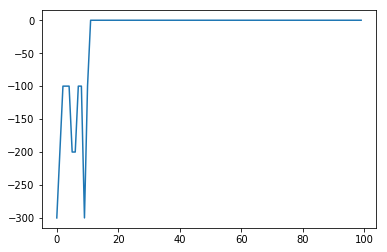

In [15]:
plt.plot(range(EPISODES)[0:100], rewardList[0:100])

In [16]:
matrix

array([[-1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1., -2.]])

In [17]:
statec = (0, 0)#current state
while(True):
    print(statec, end = "->")
    if(statec == (N-1, N-1)):
        break
    #choose current action with maximum Q value
    statenew, actionc = chooseAction(matrix, statec, Q)
    statec = statenew

(0, 0)->(1, 0)->(1, 1)->(1, 2)->(2, 2)->(2, 3)->(3, 3)->(4, 3)->(5, 3)->(5, 4)->(5, 5)->(5, 6)->(5, 7)->(5, 8)->(5, 9)->(6, 9)->(7, 9)->(8, 9)->(9, 9)->